In [1]:
import pandas as pd

In [5]:
df_13 = pd.read_excel("../data/20210913.xlsx",engine = 'openpyxl',index_col=0) ## 종목코드 처음에있는 컬럼을 index로 설정
df_14 = pd.read_excel("../data/20210914.xlsx",engine = 'openpyxl',index_col=0)



In [8]:
df_13.head(1)

,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
종목코드,,,,,,,,,,,
095570,AJ네트웍스,5830,-130,-2.18,5980,5980,5800,133188,780734220,272973979850,46822295


In [15]:
## 시가 0인 데이터 있는지 확인
df_13 = df_13[(df_13['시가']!=0)]
df_14 = df_14[(df_14['시가']!=0)]

In [22]:
## 추가 상자된 기업이 있는지 체크
## difference 두 값에 차이가 있는지 있으면 타나남
idx = df_14.index.difference(df_13.index)
df_14.loc[idx, "종목명"]

종목코드
395400    SK리츠
Name: 종목명, dtype: object

In [23]:
전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13["시가총액"].sum()
증감율 = (전일비교시가총액 + df_14.loc[idx[0],'시가총액']) / 전일비교시가총액
당일기준시가총액 = 증감율 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0067170373639553


#삼성전자와 코스피 관계


In [25]:
df =df_14[["종목명","종가","시가총액"]]
df.head(2)

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700


In [26]:
df['비중'] = df['시가총액']/df['시가총액'].sum()*100
df.sort_values('비중',ascending=False)

C:\Users\msi\AppData\Local\Temp\ipykernel_14948\3034380877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['비중'] = df['시가총액']/df['시가총액'].sum()*100


,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.069204
000660,SK하이닉스,107500,78260254237500,3.434663
035420,NAVER,402500,66116016487500,2.901680
207940,삼성바이오로직스,913000,60408645000000,2.651197
005935,삼성전자우,71400,58754110380000,2.578583
...,...,...,...,...
001527,동양2우B,16550,5106816950,0.000224
002787,진흥기업2우B,16050,4731668400,0.000208
000547,흥국화재2우B,29500,4531200000,0.000199


In [27]:
import numpy as np


In [28]:
kospi = pd.read_excel("../data/kospi.xlsx",engine="openpyxl")
samsung = pd.read_excel("../data/samsung.xlsx",engine ="openpyxl")

c:\Users\msi\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\msi\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
samsung.head(1) 

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/08/31,76700,2100,2.82,74900,76700,74300,24630370,1864084402507,457882321585000,5969782550


In [36]:
data = [kospi['종가'],samsung['종가']]
df = pd.concat(data,axis=1,keys=["kospi","samsung"])
df.head()

,kospi,samsung
0,3199.27,76700
1,3144.19,74600
2,3133.90,74300
3,3128.53,74600
4,3146.81,75700


<AxesSubplot:xlabel='samsung', ylabel='kospi'>

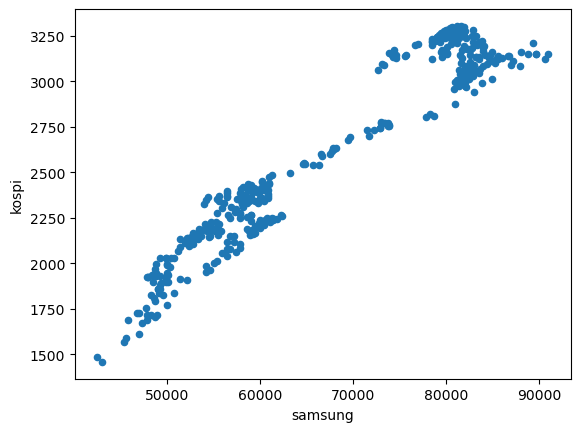

In [38]:
df.plot.scatter(x='samsung',y='kospi')

In [39]:
df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


In [44]:
kospi = pd.read_excel("../data/kospi.xlsx",usecols=[0,1,4,5,6,7],parse_dates=[0]) ## usecols= [] 필요한 컬럼만 , parse_dates=[], 컬럼을 시계열로 바꾸겠다.
kospi.head()

c:\Users\msi\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [47]:
## group by에서 사용하는 함수
## min, max,sum,mean,count,first,last ex)시가변수는 first 고가변수는 max ....
how = {
    '시가' : 'first',
    '고가' : 'max',
    '저가' : 'min',
    '종가' : 'last',
    '거래량' : 'sum'
}

## pd.Grouper 함수를 이용하여 인자값으로 key = '변수명', freq=format(m:월별,q:분기별) ex) freq = '10d' 10일별로 나옴
kospi.groupby(pd.Grouper(key='일자',freq='m')).agg(how)

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-31,2201.21,2277.23,2119.01,2119.01,13096068
2020-02-29,2086.61,2255.49,1980.82,1987.01,13959766
2020-03-31,1997.03,2089.08,1439.43,1754.64,17091025
2020-04-30,1737.28,1957.51,1664.13,1947.56,21045123
2020-05-31,1906.42,2054.52,1894.29,2029.60,16206497
2020-06-30,2037.04,2217.21,2030.82,2108.33,19863703
2020-07-31,2128.81,2281.41,2101.33,2249.37,18866785
2020-08-31,2251.65,2458.17,2237.04,2326.17,17643125
2020-09-30,2340.19,2450.53,2267.63,2327.89,19606894


In [ ]:
### krx 라이브러리
!pip install pykrx

In [50]:
from pykrx import stock

In [53]:
ticker =stock.get_market_ticker_list("20190225")
ticker

901

In [54]:
stock.get_market_ticker_list(market="KOSDAQ")

['060310',
 '054620',
 '265520',
 '211270',
 '013720',
 '035760',
 '311690',
 '051500',
 '058820',
 '023460',
 '056730',
 '065770',
 '083660',
 '404950',
 '367340',
 '367360',
 '068790',
 '241520',
 '245620',
 '037370',
 '050120',
 '084180',
 '214270',
 '130500',
 '900290',
 '083450',
 '297890',
 '078150',
 '195940',
 '028300',
 '067630',
 '047920',
 '115450',
 '403870',
 '036640',
 '351340',
 '388790',
 '405350',
 '424760',
 '426550',
 '439730',
 '442770',
 '095340',
 '099520',
 '950170',
 '067290',
 '035900',
 '318000',
 '024840',
 '024120',
 '021320',
 '036670',
 '044180',
 '151860',
 '046440',
 '035600',
 '226360',
 '111870',
 '060720',
 '058400',
 '114450',
 '060370',
 '122450',
 '052900',
 '086960',
 '160550',
 '053290',
 '104200',
 '060250',
 '030190',
 '024940',
 '218410',
 '327260',
 '091340',
 '419530',
 '019550',
 '950110',
 '046140',
 '151910',
 '036120',
 '099220',
 '036540',
 '255220',
 '040610',
 '049470',
 '184230',
 '016250',
 '048550',
 '063440',
 '289080',
 '089230',

In [59]:
df = stock.get_market_ohlcv('20200101','20221220','005930',"m")
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-01-31,55500,62800,54600,56400,319891636
2020-02-29,55500,62000,54200,54200,360007160
2020-03-31,54300,58000,42300,47750,856741868
2020-04-30,47450,52000,45350,50000,424101937
2020-05-31,48900,51200,47200,50700,374264673


In [60]:
ticker

['095570',
 '068400',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '037560',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '004840',
 '155660',
 '069730',
 '017940',
 '007700',
 '114090',
 '078930',
 '006360',
 '001250',
 '007070',
 '078935',
 '012630',
 '039570',
 '089470',
 '294870',
 '082740',
 '003560',
 '175330',
 '234080',
 '001060',
 '001067',
 '001065',
 '096760',
 '105560',
 '002380',
 '009070',
 '009440',
 '119650',
 '092220',
 '001390',
 '001940',
 '025000',
 '092230',
 '000040',
 '044450',
 '030200',
 '033780',
 '030210',
 '058850',
 '093050',
 '003550',
 '034220',
 '001120',
 '051900',
 '051905',
 '003555',
 '032640',
 '011070',
 '066570',
 '066575',
 '108670',
 '108675',
 '051910',
 '051915',
 '079550',
 '006260',
 '000680',
 '010120',
 '229640',
 '023150',
 '035420',
 '181710',
 '005940',
 '005945',
 '034310',
 '008260',
 '004250',

In [61]:
import time

In [62]:
tickers = stock.get_market_ticker_list()

In [65]:
tickers[0:4]

['095570', '006840', '027410', '282330', '138930']

In [66]:
for i in tickers[:4]:
    df = stock.get_market_ohlcv('20210101','20220101',i)
    df.to_csv(f"{i}.csv")                # f함수를 통해 파일명을 
    time.sleep(1)                        # time.sleep 1초간잠깐 쉰다. for문 동안

### CAGR
1. 연복리수익률
2. (최조자산 / 최초자산)^(1/투자기간)-1    -> 연복리수익률이므로 투자기간 12

In [68]:
kospi = pd.read_excel("../data/kospi.xlsx",usecols=[0,1],index_col=0,parse_dates=True)

c:\Users\msi\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [69]:
kospi.head()

,종가
일자,
2021-08-31,3199.27
2021-08-30,3144.19
2021-08-27,3133.90
2021-08-26,3128.53
2021-08-25,3146.81


In [74]:
kospi = kospi.sort_index()
kospi

,종가
일자,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31
...,...
2021-08-25,3146.81
2021-08-26,3128.53
2021-08-27,3133.90


In [75]:
수익율 = kospi.iloc[-1,0] / kospi.iloc[0,0]
수익율

1.4708137754750203

In [76]:
diff = kospi.index[-1]-kospi.index[0]
diff  ## 607일

Timedelta('607 days 00:00:00')

In [83]:
투자기간 = diff.days /365
CARG = 수익율 **(1/투자기간)-1
print(CARG*100)

26.111719470122587
